In [1]:
# Import Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regressor
from sklearn.metrics import mean_squared_error  # For evaluating model performance
import matplotlib.pyplot as plt  # For plotting

In [2]:
# Load the Dataset
df = pd.read_csv('../Dataset/Walmart.csv')

In [3]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
# Extract features (X) and target (y)
X, y = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], df['Weekly_Sales']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [6]:
# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [7]:
# Train the Random Forest Regressor
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
#  Make predictions on the test set
y_pred_test = rf_model.predict(X_test)

In [9]:
# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on Test Set (Random Forest): %.2f" % rmse_test)

RMSE on Test Set (Random Forest): 526441.74


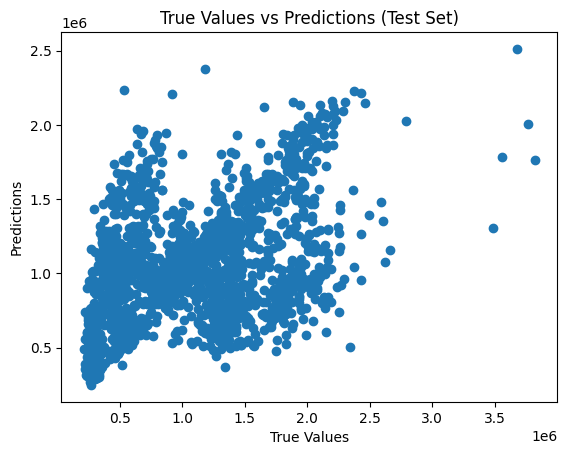

In [10]:
# Plotting True Values vs Predictions for the 
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Test Set)")
plt.show()

In [16]:
# Make predictions for new data
X_new = [[1, 70, 3.50, 220, 7.5]]

# Suppress the warning by setting feature_names_in_ to None
rf_model.feature_names_in_ = None
y_pred_new = rf_model.predict(X_new)
print("Predicted Sales for New Data (Random Forest):", y_pred_new[0])


Predicted Sales for New Data (Random Forest): 948916.0758866669
